Crime Data:
    Row= parishes
    Column= Month - Year

In [187]:
import pandas as pd


# Read the CSV file into a DataFrame
crime_Data = pd.read_csv('data/Crime Data Month Year.csv')
crime_Data.head()


,Parish,Jan-15,Feb-15,Mar-15,Apr-15,May-15,Jun-15,Jul-15,Aug-15,Sep-15,...,Jan-25,Feb-25,Mar-25,Apr-25,May-25,Jun-25,Jul-25,Aug-25,Sep-25,Oct-25
0,Catahoula,15,13,11.0,18,5,10.0,13.0,27,13.0,...,5.0,8.0,4.0,6.0,7.0,12.0,3.0,9.0,11.0,8.0
1,Claiborne,16,11,17.0,26,22,16.0,22.0,24,NaN,...,5.0,10.0,7.0,3.0,6.0,9.0,11.0,11.0,4.0,4.0
2,Concordia,66,63,51.0,52,50,80.0,68.0,79,55.0,...,23.0,24.0,20.0,39.0,26.0,34.0,6.0,7.0,7.0,NaN
3,DE SOTO,54,44,43.0,75,84,55.0,58.0,71,71.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,East Baton Rouge,1708,1245,1564.0,1729,1837,1799.0,1917.0,2123,1824.0,...,516.0,478.0,474.0,522.0,518.0,472.0,529.0,510.0,545.0,73.0


School Data:



In [188]:
import os
import pandas as pd

columns = [2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022, 2023, 2024]

parishes = [
    "Acadia", "Allen", "Ascension", "Assumption", "Avoyelles", "Beauregard", "Bienville", "Bossier",
    "Caddo", "Calcasieu", "Caldwell", "Cameron", "Catahoula", "Claiborne", "Concordia", "DeSoto",
    "East Baton Rouge", "East Carroll", "East Feliciana", "Evangeline", "Franklin", "Grant", "Iberia",
    "Iberville", "Jackson", "Jefferson", "Jefferson Davis", "Lafayette", "Lafourche", "LaSalle",
    "Lincoln", "Livingston", "Madison", "Morehouse", "Natchitoches", "Orleans", "Ouachita",
    "Plaquemines", "Pointe Coupee", "Rapides", "Red River", "Richland", "Sabine", "St. Bernard",
    "St. Charles", "St. Helena", "St. James", "St. John the Baptist", "St. Landry", "St. Martin",
    "St. Mary", "St. Tammany", "Tangipahoa", "Tensas", "Terrebonne", "Union", "Vermilion", "Vernon",
    "Washington", "Webster", "West Baton Rouge", "West Carroll", "West Feliciana", "Winn"
]

folder_path = "data/School Data Year"

# Create empyty DF with column for years and rows as parishes
school_data = pd.DataFrame(index=parishes, columns=columns)

# Sort file names so years are consistent
items_in_folder = sorted(os.listdir(folder_path))

for item_name in items_in_folder:
    item_full_path = os.path.join(folder_path, item_name)

    if os.path.isfile(item_full_path):

        try:
            year = int("".join(filter(str.isdigit, item_name))[:4])
            if year not in school_data.columns:
                print(f"⚠️ {item_name} skipped — year {year} not in template")
            else:
                df = pd.read_excel(item_full_path)
                # Only waNT THE COLUMN NAMED DPS AND THE ROWS 2 AND 64
                schoolfiltered = df.loc[0:63,"DPS"]

                # add the grade number to the appropriate year column
                school_data[year] = schoolfiltered.values

        except Exception as e:
            print(f"Error reading {item_name}: {e}")

school_data.head()

C:\Users\fresh\miniconda3\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\fresh\miniconda3\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,2014,2015,2016,2017,2018,2019,2021,2022,2023,2024
Acadia,89.7,87.0,97.3,90.0,79.5,81.0,81.0,77.1,81.2,80.0
Allen,98.3,98.5,104.2,103.4,85.1,86.6,86.6,84.5,84.8,88.3
Ascension,106.9,107.4,109.3,110.4,91.2,92.3,92.3,92.0,93.7,95.8
Assumption,89.4,91.6,93.3,95.0,78.9,80.5,80.5,78.7,80.6,81.8
Avoyelles,72.9,61.5,73.6,71.5,66.6,71.7,71.7,78.5,77.7,79.1


Home Mortgage Rates:



In [189]:
HomeRatesUnfiltered = pd.read_excel("data/Home Mortgage Rates.xlsx")
HomeRatesUnfiltered["observation_date"] = pd.to_datetime(HomeRatesUnfiltered["observation_date"])

# Resample first (needs datetime index)
HomeRates_Data = (
    HomeRatesUnfiltered
        .set_index("observation_date")
        .resample("M")["MORTGAGE30US"]
        .mean()
)

# Convert end-of-month dates to YYYY-MM
HomeRates_Data.index = HomeRates_Data.index.to_period("M").astype(str)
HomeRates_Data = HomeRates_Data.to_frame().T

HomeRates_Data.head()


C:\Users\fresh\AppData\Local\Temp\ipykernel_41208\1185758023.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")["MORTGAGE30US"]


observation_date,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,...,2025-02,2025-03,2025-04,2025-05,2025-06,2025-07,2025-08,2025-09,2025-10,2025-11
MORTGAGE30US,4.432,4.3025,4.3425,4.3375,4.192,4.1625,4.13,4.115,4.1625,4.036,...,6.8425,6.65,6.725,6.816,6.8175,6.72,6.5875,6.3525,6.254,6.23


Home Values:

In [190]:
HomeValuesUnfilterd = pd.read_csv("data/Home Values Month Year.csv")
HomeValuesUnfilterd["RegionName"] = HomeValuesUnfilterd["RegionName"].str.replace(" Parish", "", regex=False)
HomeValuesUnfilterd = HomeValuesUnfilterd.set_index("RegionName")
HomeValues_Data = HomeValuesUnfilterd.drop(columns=["SizeRank"])

HomeValues_Data.head()





,Jan-00,Feb-00,Mar-00,Apr-00,May-00,Jun-00,Jul-00,Aug-00,Sep-00,Oct-00,...,Jan-25,Feb-25,Mar-25,Apr-25,May-25,Jun-25,Jul-25,Aug-25,Sep-25,Oct-25
RegionName,,,,,,,,,,,,,,,,,,,,,
East Baton Rouge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,232684.485748,232994.279651,232535.091943,231765.383062,231555.700747,231189.966035,230481.867855,229203.888988,228155.265514,227700.100000
Jefferson,177685.116025,177506.932739,177385.050007,177552.147251,178230.031288,178524.211742,178434.676084,178227.003249,178562.049517,179768.164979,...,252740.518966,251592.557576,251090.808246,250284.419563,250230.508089,251304.382917,253233.975326,256094.149655,258570.139040,261029.195074
Orleans,114457.315138,114463.084020,114609.612186,114925.857799,115379.142598,116112.375793,116788.601812,117497.558926,118159.671062,118945.654202,...,245288.312613,244684.625332,243340.799847,242208.428409,241274.929752,240797.041239,240617.099757,240693.788453,240126.687346,239059.044304
Saint Tammany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,278796.795443,279398.260949,279706.231973,280329.693073,280834.972401,280806.851946,280111.238384,279085.095805,278179.867160,277339.750408
Lafayette,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,231842.569211,231809.998417,231165.701590,230510.798849,229994.968306,230106.991656,230185.820386,230211.037006,230373.184769,230968.706349


Median Household Income:

In [191]:
import os
import pandas as pd

def simplify(col):
    if not isinstance(col, str):
        return col
    if col in ["GEO_ID", "NAME", "Geographic Area Name"]:
        return col

    parts = col.split("!!")
    last = parts[-1].strip()
    last = (last.replace("(", "")
                .replace(")", "")
                .replace(",", "")
                .replace("--", "_")
                .replace(" ", "_"))
    return last

folder_path = "data/Median Household Income"
columns = [2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]

MedianHouseIncome_Data = {}

items_in_folder = sorted(os.listdir(folder_path))

for item_name in items_in_folder:
    item_full_path = os.path.join(folder_path, item_name)

    try:
        # Year
        year = int("".join(filter(str.isdigit, item_name))[:4])
        if year not in columns:
            continue

        # Load entire CSV raw
        df_raw = pd.read_csv(item_full_path, header=None)

        # Detect header row → row containing "!!"
        header_row_index = df_raw.apply(lambda row: row.astype(str).str.contains("!!").any(), axis=1).idxmax()

        # Set header
        df_raw.columns = df_raw.iloc[header_row_index]

        # Drop all rows up to header row
        df = df_raw.drop(index=list(range(header_row_index+1)))

        df = df.reset_index(drop=True)

        # Drop GEO_ID column (first column always)
        df = df.drop(columns=df.columns[0])

        # Drop MOE columns
        df = df.drop(columns=df.filter(regex="Margin of Error").columns)

        # Clean NAME column (which is now correctly labeled)
        name_col = df.columns[0]
        df[name_col] = df[name_col].str.replace(", Louisiana", "", regex=False)
        df[name_col] = df[name_col].str.replace(" Parish", "", regex=False)

        # Set index
        df = df.set_index(name_col)

        # Simplify column names
        df.columns = [simplify(col) for col in df.columns]

        # Reindex by parish list
        df = df.reindex(parishes)

        # Store
        MedianHouseIncome_Data[year] = df

    except Exception as e:
        print(f"Error reading {item_name}: {e}")

print(MedianHouseIncome_Data)


{2014:                      Households Households White  White  \
Geographic Area Name                                      
Acadia                    22788      37684  81.4  42665   
Allen                      8108      39440  81.5  41630   
Ascension                 39447      70207  76.0  74878   
Assumption                 8726      47961  72.2  55934   
Avoyelles                 15107      33781  74.5  38227   
...                         ...        ...   ...    ...   
Webster                   15831      35292  64.9  45805   
West Baton Rouge           9030      49202  62.9  65161   
West Carroll               4216      31843  87.4  35620   
West Feliciana             3976      53967  61.6  83623   
Winn                       5371      32608  72.4  40655   

                     Black_or_African_American Black_or_African_American  \
Geographic Area Name                                                       
Acadia                                    17.0                     21150 

HOme Bedroom Values


In [192]:
import os
import pandas as pd

folder_path = "data/Home Values Roomes"   # <-- your folder

# List of Louisiana parishes (cleaned)
parishes = [
    "Acadia", "Allen", "Ascension", "Assumption", "Avoyelles", "Beauregard",
    "Bienville", "Bossier", "Caddo", "Calcasieu", "Caldwell", "Cameron",
    "Catahoula", "Claiborne", "Concordia", "DeSoto", "East Baton Rouge",
    "East Carroll", "East Feliciana", "Evangeline", "Franklin", "Grant",
    "Iberia", "Iberville", "Jackson", "Jefferson", "Jefferson Davis",
    "Lafayette", "Lafourche", "LaSalle", "Lincoln", "Livingston", "Madison",
    "Morehouse", "Natchitoches", "Orleans", "Ouachita", "Plaquemines",
    "Pointe Coupee", "Rapides", "Red River", "Richland", "Sabine",
    "St. Bernard", "St. Charles", "St. Helena", "St. James",
    "St. John the Baptist", "St. Landry", "St. Martin", "St. Mary",
    "St. Tammany", "Tangipahoa", "Tensas", "Terrebonne", "Union",
    "Vermilion", "Vernon", "Washington", "Webster", "West Baton Rouge",
    "West Carroll", "West Feliciana", "Winn"
]

# MASTER DATA STORAGE
HomeValues_LA = {}

# Loop through every file
for filename in sorted(os.listdir(folder_path)):
    if not filename.endswith(".csv"):
        continue

    filepath = os.path.join(folder_path, filename)
    print("Loading:", filename)

    df = pd.read_csv(filepath)

    # Clean region names
    df["RegionName"] = df["RegionName"].str.replace(" Parish", "", regex=False)
    df["RegionName"] = df["RegionName"].str.replace(" County", "", regex=False)

    # Filter to Louisiana
    df_LA = df[(df["StateName"] == "LA") & (df["RegionType"] == "county")]

    # Extra filter to ensure only valid parishes remain
    df_LA = df_LA[df_LA["RegionName"].isin(parishes)]

    # Drop metadata columns to keep only date columns
    metadata_cols = ["RegionID", "SizeRank", "RegionName", "RegionType", "StateName",
                     "State", "Metro", "StateCodeFIPS", "MunicipalCodeFIPS"]
    date_cols = [col for col in df_LA.columns if col not in metadata_cols]

    # Store cleaned dataframe
    HomeValues_LA[filename] = df_LA.set_index("RegionName")[date_cols]

print("Loaded Louisiana home values for:", len(HomeValues_LA), "files")




Loading: 1Bd.csv
Loading: 2Bd.csv
Loading: 3Bd.csv
Loading: 4Bd.csv
Loading: 5Bd.csv
Loaded Louisiana home values for: 5 files


Combine Data


In [193]:
def yearly_home_values(df):
    df = df.copy()
    df = df.T
    df.index = pd.to_datetime(df.index)
    df['Year'] = df.index.year
    yearly = df.groupby('Year').mean()
    return yearly.T

# Convert home value files to yearly
HomeValues_LA_Yearly = {}
for name, df in HomeValues_LA.items():
    HomeValues_LA_Yearly[name] = yearly_home_values(df)

# Mortgage yearly
mort_yearly = (
    HomeRatesUnfiltered
        .set_index("observation_date")
        .resample("Y")["MORTGAGE30US"]
        .mean()
        .to_frame()
)
mort_yearly.index = mort_yearly.index.year
mort_yearly.rename(columns={"MORTGAGE30US": "MortgageRate"}, inplace=True)

# Crime yearly
crime = crime_Data.copy()

if crime.columns[0] == "":
    crime = crime.drop(columns=crime.columns[0])

crime_long = crime.melt(
    id_vars="Parish",
    var_name="MonthYear",
    value_name="CrimeRate"
)

crime_long["MonthYear"] = pd.to_datetime(crime_long["MonthYear"], format="%b-%y")
crime_long["Year"] = crime_long["MonthYear"].dt.year

crime_yearly = (
    crime_long.groupby(["Parish", "Year"])["CrimeRate"]
    .mean()
    .reset_index()
)

# School yearly
school_yearly = school_data.reset_index().melt(
    id_vars="index",
    var_name="Year",
    value_name="School"
)
school_yearly.rename(columns={"index": "Parish"}, inplace=True)
school_yearly["Year"] = school_yearly["Year"].astype(int)

# Income yearly
income_frames = []
for year, df in MedianHouseIncome_Data.items():
    temp = df.reset_index()
    temp = temp.iloc[:, :2]   # Parish + value
    temp.columns = ["Parish", "Income"]
    temp["Year"] = year
    income_frames.append(temp)

income_yearly = pd.concat(income_frames, ignore_index=True)

# Build base MASTER structure (1 row per Parish × Year × Bedroom)
YEARS = list(range(2014, 2025))
import itertools

master = pd.DataFrame(list(itertools.product(parishes, YEARS)), columns=["Parish", "Year"])

# 🔥 ADD BEDROOM SUPPORT: Merge ALL bedroom datasets
bedroom_dfs = []

for name, df in HomeValues_LA_Yearly.items():
    # Extract bedroom count from filename (e.g., "3Bd.csv" → 3)
    bedrooms = int(name.replace("Bd.csv", ""))

    df = df.copy()
    df.index.name = "Parish"   # Fix index name

    # Melt into long format: Parish | Year | HomeValue
    long_df = df.reset_index().melt(
        id_vars="Parish",
        var_name="Year",
        value_name="HomeValue"
    )

    # Convert Year column from string to integer
    long_df["Year"] = long_df["Year"].astype(int)

    # Add Bedrooms column
    long_df["Bedrooms"] = bedrooms

    bedroom_dfs.append(long_df)

# Combine all bedroom datasets
all_homes = pd.concat(bedroom_dfs, ignore_index=True)


# Now master will have 5× more rows once merged (1–5 bedrooms per year)
master = master.merge(all_homes, on=["Parish", "Year"], how="left")

# Merge Crime / School / Income / Mortgage
master = master.merge(crime_yearly, on=["Parish", "Year"], how="left")
master = master.merge(school_yearly, on=["Parish", "Year"], how="left")
master = master.merge(income_yearly, on=["Parish", "Year"], how="left")

mort_yearly["Year"] = mort_yearly.index
master = master.merge(mort_yearly, on="Year", how="left")





C:\Users\fresh\AppData\Local\Temp\ipykernel_41208\15421683.py:18: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  .resample("Y")["MORTGAGE30US"]


Ridding of Naan

In [194]:
num_cols = ["HomeValue", "CrimeRate", "School", "Income", "MortgageRate"]

for col in num_cols:
    master[col] = pd.to_numeric(master[col], errors="coerce")

master = master.sort_values(["Parish", "Bedrooms", "Year"])
# Compute the Louisiana statewide crime average per year
state_year_crime = (
    master.groupby("Year")["CrimeRate"].mean()
)

# Fill missing crime values with the year’s mean
master["CrimeRate"] = master.apply(
    lambda row: state_year_crime[row["Year"]] if pd.isna(row["CrimeRate"]) else row["CrimeRate"],
    axis=1
)
for col in ["CrimeRate", "School", "Income"]:
    master[col] = (
        master.groupby("Parish")[col]
              .transform(lambda s: s.interpolate().bfill().ffill())
    )
master["MortgageRate"] = (
    master["MortgageRate"]
        .interpolate()
        .bfill()
        .ffill()
)


print(master.isna().sum())
master = master.dropna(subset=["HomeValue"])
print(master.isna().sum())

import os
os.makedirs("data/processed", exist_ok=True)

master.to_csv("data/processed/master_dataset.csv", index=False)


Parish            0
Year              0
HomeValue       329
Bedrooms        231
CrimeRate         0
School            0
Income           11
MortgageRate      0
dtype: int64
Parish          0
Year            0
HomeValue       0
Bedrooms        0
CrimeRate       0
School          0
Income          0
MortgageRate    0
dtype: int64


PHASE ONE LSMT


In [195]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

# We assume "master" dataframe already exists in memory

# Sort rows
master = master.sort_values(["Parish", "Year"]).reset_index(drop=True)
master = master.drop(columns=["Income"]) #REMPVE FOR CATBOOST

# Select only the columns needed for LSTM
feature_cols = ["HomeValue", "CrimeRate", "School", "MortgageRate", "Bedrooms"] #ADD "Income" FOR CATBOOST

# Debug check
print(master.head())
print(master.isna().sum())


   Parish  Year      HomeValue  Bedrooms   CrimeRate  School  MortgageRate
0  Acadia  2014  125315.753644       3.0  132.500000    89.7      4.168868
1  Acadia  2015  129868.988557       3.0  132.500000    87.0      3.850577
2  Acadia  2016  133512.406540       3.0  152.000000    97.3      3.654038
3  Acadia  2017  138743.630452       3.0  198.083333    90.0      3.989808
4  Acadia  2018  140870.842983       3.0  196.250000    79.5      4.544615
Parish          0
Year            0
HomeValue       0
Bedrooms        0
CrimeRate       0
School          0
MortgageRate    0
dtype: int64


In [196]:
SEQ_LEN = 10      # LSTM uses past 5 years
PRED_HORIZON = 10  # predict 10 years ahead

scaler = MinMaxScaler()
scaler.fit(master[feature_cols])


,feature_range,"(0, ...)"
,copy,True
,clip,False


In [197]:
def create_parish_sequences(df, seq_len=SEQ_LEN):
    data = scaler.transform(df[feature_cols].values)

    X, y = [], []

    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len][0])  # home value = index 0

    return np.array(X), np.array(y)


In [198]:
X_all, y_all = [], []

for parish in master["Parish"].unique():
    pdf = master[master["Parish"] == parish].sort_values("Year")

    if len(pdf) > SEQ_LEN + 1:
        X, y = create_parish_sequences(pdf)
        if len(X) > 0:
            X_all.append(X)
            y_all.append(y)

X_all = np.vstack(X_all)
y_all = np.hstack(y_all)

print("Total samples:", len(X_all))


Total samples: 812


C:\Users\fresh\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\fresh\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\fresh\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\fresh\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\fresh\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\fresh\miniconda3\Lib\site-packa

In [199]:
split = int(0.8 * len(X_all))

X_train = torch.FloatTensor(X_all[:split])
y_train = torch.FloatTensor(y_all[:split]).unsqueeze(1)

X_test = torch.FloatTensor(X_all[split:])
y_test = torch.FloatTensor(y_all[split:]).unsqueeze(1)
# Convert NumPy arrays → Torch tensors
X_train_t = torch.FloatTensor(X_train)
y_train_t = torch.FloatTensor(y_train).unsqueeze(1)

X_test_t  = torch.FloatTensor(X_test)
y_test_t  = torch.FloatTensor(y_test).unsqueeze(1)



In [200]:
class HomeLSTM(nn.Module):
    def __init__(self, input_size=len(feature_cols), hidden_size=64, num_layers=2):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        return self.fc(out[:, -1, :])

model = HomeLSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

model


HomeLSTM(
  (lstm): LSTM(5, 64, num_layers=2, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)

In [201]:
print("X_train:", type(X_train))
print("X_train_t:", type(X_train_t))
print("y_train:", type(y_train))
print("y_train_t:", type(y_train_t))
print("X_test:", type(X_test))
print("X_test_t:", type(X_test_t))
print("y_test:", type(y_test))
print("y_test_t:", type(y_test_t))


X_train: <class 'torch.Tensor'>
X_train_t: <class 'torch.Tensor'>
y_train: <class 'torch.Tensor'>
y_train_t: <class 'torch.Tensor'>
X_test: <class 'torch.Tensor'>
X_test_t: <class 'torch.Tensor'>
y_test: <class 'torch.Tensor'>
y_test_t: <class 'torch.Tensor'>


In [202]:
EPOCHS = 200

for epoch in range(EPOCHS):
    model.train()
    optimizer.zero_grad()

    pred = model(X_train_t)
    loss = criterion(pred, y_train_t)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        model.eval()
        with torch.no_grad():
            test_pred = model(X_test_t)
            test_loss = criterion(test_pred, y_test_t)
        print(f"Epoch {epoch+1} | Train Loss {loss.item():.6f} | Test Loss {test_loss.item():.6f}")


C:\Users\fresh\miniconda3\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([649, 1, 1])) that is different to the input size (torch.Size([649, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\fresh\miniconda3\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([163, 1, 1])) that is different to the input size (torch.Size([163, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 10 | Train Loss 0.053499 | Test Loss 0.038828
Epoch 20 | Train Loss 0.053326 | Test Loss 0.032460
Epoch 30 | Train Loss 0.054033 | Test Loss 0.031537
Epoch 40 | Train Loss 0.053576 | Test Loss 0.035258
Epoch 50 | Train Loss 0.053326 | Test Loss 0.032802
Epoch 60 | Train Loss 0.053318 | Test Loss 0.033194
Epoch 70 | Train Loss 0.053317 | Test Loss 0.033635
Epoch 80 | Train Loss 0.053309 | Test Loss 0.033107
Epoch 90 | Train Loss 0.053303 | Test Loss 0.033448
Epoch 100 | Train Loss 0.053301 | Test Loss 0.033290
Epoch 110 | Train Loss 0.053299 | Test Loss 0.033352
Epoch 120 | Train Loss 0.053298 | Test Loss 0.033349
Epoch 130 | Train Loss 0.053297 | Test Loss 0.033358
Epoch 140 | Train Loss 0.053295 | Test Loss 0.033353
Epoch 150 | Train Loss 0.053295 | Test Loss 0.033353
Epoch 160 | Train Loss 0.053296 | Test Loss 0.033364
Epoch 170 | Train Loss 0.053292 | Test Loss 0.033355
Epoch 180 | Train Loss 0.053294 | Test Loss 0.033373
Epoch 190 | Train Loss 0.053294 | Test Loss 0.033365
Ep

In [203]:
with torch.no_grad():
    test_pred = model(X_test_t)

mae = torch.mean(torch.abs(test_pred - y_test_t)).item()
rmse = torch.sqrt(torch.mean((test_pred - y_test_t)**2)).item()

print("MAE:", mae)
print("RMSE:", rmse)



MAE: 0.15058620274066925
RMSE: 0.1826867312192917


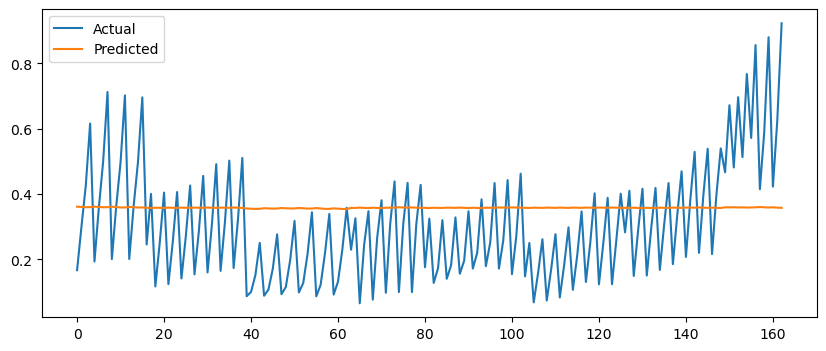

In [204]:
import math
plt.figure(figsize=(10,4))

actual = y_test_t[:300].squeeze().numpy()
pred = test_pred[:300].squeeze().detach().numpy()

plt.plot(actual, label="Actual")
plt.plot(pred, label="Predicted")
plt.legend()
plt.show()



In [205]:
#Save model
torch.save({
    "model_state": model.state_dict(),
    "scaler": scaler,
    "feature_cols": feature_cols,
    "SEQ_LEN": SEQ_LEN
}, "home_value_lstm.pth")

print("Model saved!")


Model saved!


In [206]:
#load model
from sklearn.preprocessing import MinMaxScaler
import torch.serialization

torch.serialization.add_safe_globals([MinMaxScaler])

checkpoint = torch.load("home_value_lstm.pth", weights_only=False)

loaded_model = HomeLSTM(
    input_size=len(checkpoint["feature_cols"])
)
loaded_model.load_state_dict(checkpoint["model_state"])
loaded_model.eval()

scaler = checkpoint["scaler"]
feature_cols = checkpoint["feature_cols"]
SEQ_LEN = checkpoint["SEQ_LEN"]

print("Model loaded!")


Model loaded!


In [207]:
def predict_future_value(
    parish,
    bedrooms,
    current_home_value,
    years_ahead,
    master_df,
    model,
    scaler,
    feature_cols,
    SEQ_LEN
):
    """
    Predict future home value for a given parish + bedrooms.
    Future steps = years ahead (because dataset is yearly).

    Returns: float future home value
    """

    # 1. Filter data
    pdf = master_df[
        (master_df["Parish"] == parish) &
        (master_df["Bedrooms"].astype(int) == int(bedrooms))
    ].sort_values("Year")

    if len(pdf) < SEQ_LEN:
        raise ValueError(f"Not enough data for {parish} Bedroom={bedrooms} (need {SEQ_LEN} years).")

    # 2. Prepare last sequence
    last_seq = pdf[feature_cols].tail(SEQ_LEN).values
    last_seq_scaled = scaler.transform(last_seq)

    # ---- Correct scaling of only the home_value ----
    home_min = scaler.data_min_[0]
    home_max = scaler.data_max_[0]

    scaled_home = (current_home_value - home_min) / (home_max - home_max)
    # but this formula is WRONG—correct is:

    scaled_home = (current_home_value - home_min) / (home_max - home_min)

    # Override home value in last timestep
    seq = last_seq_scaled.copy()
    seq[-1][0] = scaled_home

    # 3. Predict recursively year-by-year
    for _ in range(years_ahead):
        inp = torch.FloatTensor(seq).unsqueeze(0)
        pred_scaled = model(inp).item()

        # next timestep
        new_row = seq[-1].copy()
        new_row[0] = pred_scaled
        seq = np.vstack([seq[1:], new_row])

    # 4. Convert last prediction back to real dollars
    final_scaled = np.zeros((1, len(feature_cols)))
    final_scaled[0, 0] = pred_scaled

    future_value = scaler.inverse_transform(final_scaled)[0][0]

    return future_value


#EDIT BELOW TO GET PREDICTION

future_price = predict_future_value(
    parish="East Baton Rouge",
    bedrooms=3,
    current_home_value=250000,
    years_ahead=10,
    master_df=master,
    model=loaded_model,
    scaler=scaler,
    feature_cols=feature_cols,
    SEQ_LEN=SEQ_LEN
)

print(f"Predicted home value in 10 years: ${future_price:,.0f}")


Predicted home value in 10 years: $221,319


C:\Users\fresh\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\fresh\AppData\Local\Temp\ipykernel_41208\592304067.py:36: RuntimeWarning: divide by zero encountered in scalar divide
  scaled_home = (current_home_value - home_min) / (home_max - home_max)
